# Logging with `dataframe_utils`

One may use the `log2html` or `log2latex` functions in `dataframe_utils` to generate logs in HTML or LaTeX format and display them in the browser once they are generated.

Place them somewhere in your Python scripts so that you can see the results in the browser rather than in the console.

In [1]:
# use project files rather than the installed PyBMF

%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

c:\Users\nieht\miniconda3\envs\pybmf\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : 2
[I] seed         : 1000
[I] noise        : 2
[I] seed         : 2000
[I] Using RandomState.


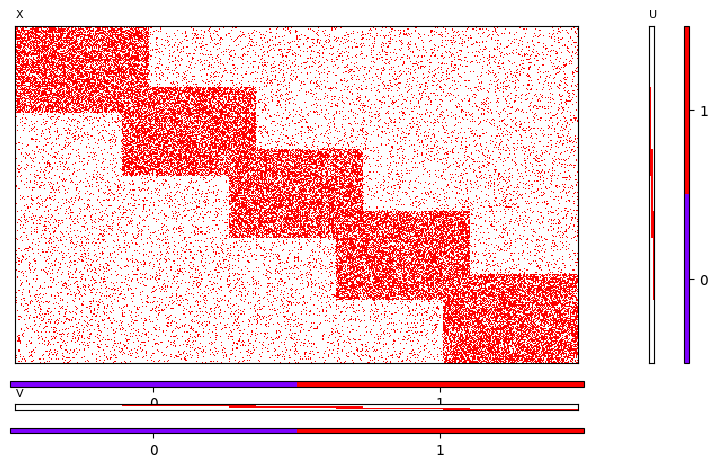

<Figure size 640x480 with 0 Axes>

In [2]:
# generating synthetic data

from PyBMF.generators import BlockDiagonalMatrixGenerator

data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.3, 0.2])
data.generate(seed=1000)
data.add_noise(noise=[0.4, 0.1], seed=2000)

data.show_matrix(scaling=0.5)

In [3]:
from PyBMF.datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split = NoSplit(X=data.X)

# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1724665875
[I]   train_size   : 39251
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1724665875


[I] tau          : 0.25
[I] k            : 5
[I] tol          : 0
[I] w_fp         : 0.5
[I] w_fn         : None
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-08-26 17-51-15-833951 Asso


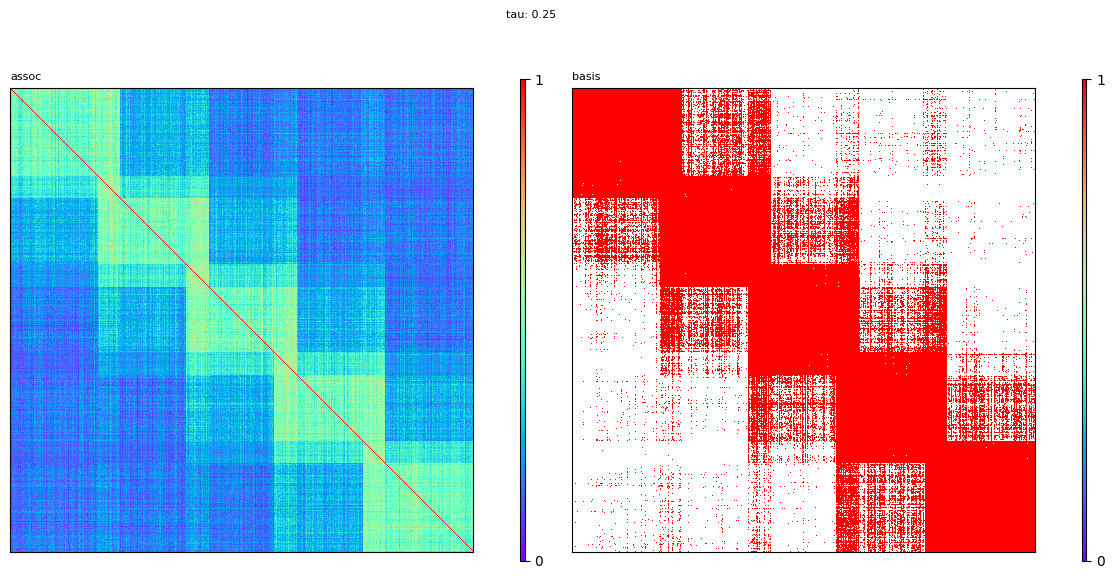

100%|██████████| 5/5 [00:11<00:00,  2.33s/it]                

[W] Stopped in advance: Reach requested factor
[I] time elapsed :  12s
C:\Users\nieht\.pybmf\saved_models/2024-08-26 17-51-15-833951 Asso.pickle C:\Users\nieht\.pybmf\saved_models
C:\Users\nieht\.pybmf\saved_models/2024-08-26 17-51-15-833951 Asso.pickle C:\Users\nieht\.pybmf\saved_models
[I] model saved as: 2024-08-26 17-51-15-833951 Asso.pickle


<Figure size 640x480 with 0 Axes>

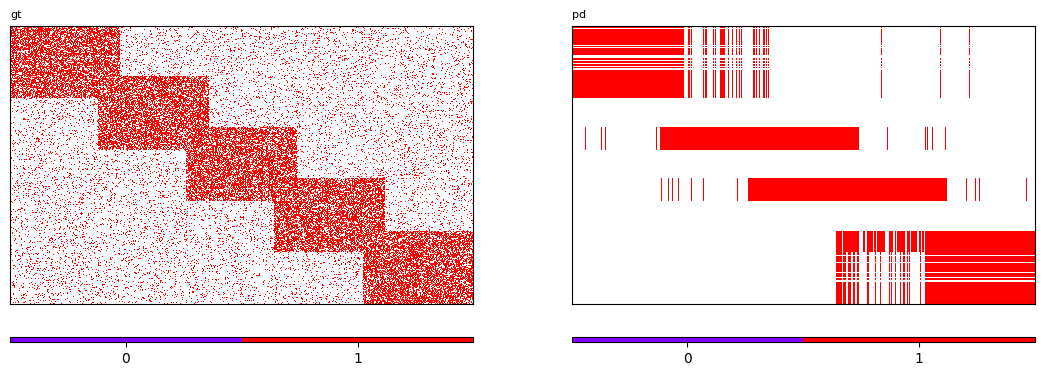

train                                       \
                              0                                        
                time  k   score score_0.5 desc_len      shape     TP   
0  26/08/24 05:51:19  0   817.5     817.5  37838.0  [71, 151]   6178   
1  26/08/24 05:51:21  1  1564.5    1564.5  36559.0  [63, 152]  11713   
2  26/08/24 05:51:23  2  2182.5    2182.5  35573.0  [24, 226]  15043   
3  26/08/24 05:51:26  3  2797.5    2797.5  34590.0  [24, 223]  18334   
4  26/08/24 05:51:28  4  2953.0    2953.0  34491.0  [23, 189]  18938   

                                                                             \
                                                                              
        TPR     FP       FPR     FN       FNR       ERR       ACC    Recall   
0  0.157397   4543  0.041021  33073  0.842603  0.250773  0.749227  0.157397   
1  0.298413   8584  0.077509  27538  0.701587  0.240813  0.759187  0.298413   
2  0.383251  10678  0.096416  24208  0.616749  0.232573  0.767427  0.383251   
3  0.467096  12739  0.115026  20917  0.532904  0.224373  0.775627  0.467096   
4  0.482485  13032  0.117671  20313  0.517515  0.222300  0.777700  0.482485   

                       
                       
  Precision        F1  
0  0.576252  0.247258  
1  0.577080  0.393397  
2  0.584853  0.463061  
3  0.590030  0.521415  
4  0.592368  0.531809

<Figure size 640x480 with 0 Axes>

In [4]:
from PyBMF.models import Asso

k = 5
tau = 0.25
w_fp = 0.5

model = Asso(k=k, tau=tau, w_fp=w_fp)
model.fit(X_train=X_train, X_val=None, X_test=None, task='reconstruction', verbose=False, display=False)

In [7]:
# render as HTML and open in browser

from PyBMF.utils import log2html
log2html(df=model.logs['updates'], log_name=model.name, open_browser=True)

C:\Users\nieht\.pybmf\saved_logs/2024-08-26 17-51-15-833951 Asso.html C:\Users\nieht\.pybmf\saved_logs
[I] HTML saved as: C:\Users\nieht\.pybmf\saved_logs\2024-08-26 17-51-15-833951 Asso.html
[I] Opening HTML in browser: C:/Program Files/Google/Chrome/Application/chrome.exe %s


In [23]:
# render as LaTeX and open in Overleaf

from PyBMF.utils import log2latex
log2latex(df=model.logs['updates'], log_name=model.name, open_browser=True)

C:\Users\nieht\.pybmf\saved_logs/2024-08-26 17-51-15-833951 Asso overleaf.html C:\Users\nieht\.pybmf\saved_logs
[I] HTML saved as: C:\Users\nieht\.pybmf\saved_logs\2024-08-26 17-51-15-833951 Asso overleaf.html
[I] Opening HTML in browser: C:/Program Files/Google/Chrome/Application/chrome.exe %s
